In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
%pylab inline
import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/PUI2015_ndsouza/plotformat.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


# Comparison by Gender

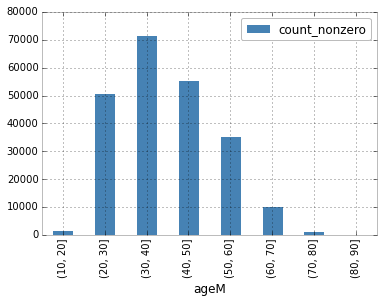

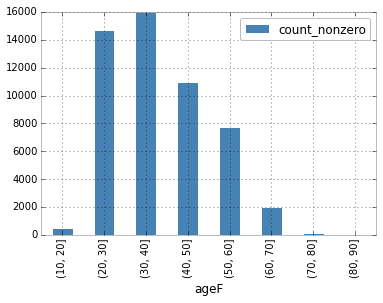

In [3]:
df=pd.read_csv('201501-citibike-tripdata.csv')
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


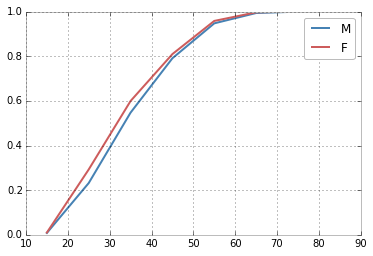

In [4]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [5]:
import scipy.stats
scipy.stats.ks_2samp(df.ageM, df.ageF)

(0.61519793242561782, 0.0)

KS test - Since the p-value is zero, we can reject the null hypothesis that the two samples come from the same distribution. (according to scipy documentation). Since the KS statistic is less than the critical value for an alpha of 0.05, hence we cannot reject the null hypothesis that the two samples come from the same distribution. (according to Wikipedia and slides)

In [6]:
ageM = np.array([a for a in df.ageM if not np.isnan(a)])
ageF = np.array([b for b in df.ageF if not np.isnan(b)])
new_ageM = np.random.choice(ageM, len(ageF), replace = False)
scipy.stats.pearsonr(new_ageM, ageF)

(-0.0070831752512805195, 0.10595651280417308)

Pearson test - The Pearson coefficient is a very small value, almost zero hence the samples are not correlated.

In [7]:
scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)

(-0.43552302983795976, 0.0)

Spearman test - The coefficient is negative and midway between 0 and -1 hence it is hard to say if the samples are not correlated or anti-correlated but looking at the cdf I would say they are uncorrelated.

#Comparison by Day and Night

In [8]:
#df['mystarttime'] = pd.to_datetime(df['starttime']).dt.hour
#df['ageD'] = df['mystarttime'].query('mystarttime <= 21 or mystarttime > 6')
#df['ageN'] = df['mystarttime'].query('mystarttime <= 6 or mystarttime > 21')
#df['starthour'] = pd.DatetimeIndex(df['starttime']).hour
#df['Subscribers'] = df['starthour'][(df['usertype']=='Subscriber')]
#dfD = df.query('starthour < 6 or starthour >= 21')
#dfN = df.query('starthour >= 6 or starthour < 21')
df=pd.read_csv('201501-citibike-tripdata.csv')

In [9]:
times = [str.split(i)[1] for i in df.starttime]
df['mystarttime'] = [dt.datetime.strptime(i, "%H:%M").hour for i in times]
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['mystarttime'] < 19) | (df['mystarttime'] > 6))]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & ((df['mystarttime'] > 19) | (df['mystarttime'] < 6))]

          count_nonzero
ageD                   
(10, 20]       0.003180
(20, 30]       0.081514
(30, 40]       0.094816
(40, 50]       0.048285
(50, 60]       0.013254
(60, 70]       0.001508
(70, 80]       0.000065
(80, 90]       0.000000


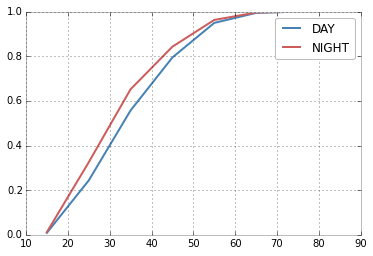

In [10]:
csD = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csD.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "DAY")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "NIGHT")
pl.legend()

In [11]:
scipy.stats.ks_2samp(df.ageD, df.ageN)

(0.85149464896060956, 0.0)

KS test - Since the p-value is zero, we can reject the null hypothesis that the two samples come from the same distribution. (according to scipy documentation). Since the KS statistic is less than the critical value for an alpha of 0.05, hence we cannot reject the null hypothesis that the two samples come from the same distribution. (according to Wikipedia and slides)

In [12]:
ageD = np.array([a for a in df.ageD if not np.isnan(a)])
ageN = np.array([b for b in df.ageN if not np.isnan(b)])
new_ageD = np.random.choice(ageD, len(ageN), replace = False)
scipy.stats.pearsonr(new_ageD, ageN)

(0.00088045876521057121, 0.86591850218025868)

Pearson test - The Pearson coefficient is a very small value, almost zero hence the samples are not correlated.

In [13]:
scipy.stats.spearmanr(df.ageD, df.ageN, axis=0)

(0.075770208465694114, 0.0)

Spearman test - The coefficient is negative and midway between 0 and -1 hence it is hard to say if the samples are not correlated or anti-correlated but looking at the cdf I would say they are uncorrelated.